<a href="https://colab.research.google.com/github/KrishnaSChavan/MachineLearning/blob/main/CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional neural network
it is a algorithm used to identify patterns in visuals data
for example
* image classification
* autopilote mode in most of the vehicles and many more

data is from kaggle but is modified and taken from zmt

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-03-30 11:35:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.5MB/s    in 3.2s    

2023-03-30 11:35:37 (32.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# training for only two classes having 101 classes
Because if we train for less amount then we will easeily classify challanges that we can get and get a great model for rest all 


the datasets are well aranged here but this will not be in case of real data

In [ ]:
!ls /content/pizza_steak/test/pizza/

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

# Getting one with data
it is the most crusial state of any machine learning project

In [ ]:
import os
#inspeting data
for dirpath, dirnames, filenames in os.walk("pizza_steak"): # os.path goes over everything that is present in te given directory
  print(f"There are {dirnames} directories and {len(filenames)} images in '{dirpath}'.")

There are ['test', 'train'] directories and 0 images in 'pizza_steak'.
There are ['steak', 'pizza'] directories and 0 images in 'pizza_steak/test'.
There are [] directories and 250 images in 'pizza_steak/test/steak'.
There are [] directories and 250 images in 'pizza_steak/test/pizza'.
There are ['steak', 'pizza'] directories and 0 images in 'pizza_steak/train'.
There are [] directories and 750 images in 'pizza_steak/train/steak'.
There are [] directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
len(os.listdir('/content/pizza_steak/train/pizza'))

750

In [ ]:
len(os.listdir('/content/pizza_steak/train/steak'))

750

In [ ]:
len(os.listdir('/content/pizza_steak/test/pizza'))

250

In [33]:
class_name = ['pizza', 'steak']

In [32]:
!nvidia-smi

Thu Mar 30 12:28:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    32W /  70W |   2877MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
num_of_train_img = len(os.listdir("/content/pizza_steak/train/steak"))
num_of_test_img = len(os.listdir("/content/pizza_steak/test/steak"))

In [ ]:
num_of_test_img

250

In [ ]:
num_of_train_img

750

#visualising images

In [ ]:
# get class name programatically
import pathlib
import numpy as np
import tensorflow as tf
import pandas as pd
data_dir = pathlib.Path('/content/pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [2]:
# visualing immages

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_img(target_dir,target_class):
    #targeting a directory
    target_folder = target_dir+"/"+target_class

    # getting random image path
    random_image = random.sample(os.listdir(target_folder),1)

    #reading image and ploting
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    # show input shape
    print(f"Image shape = {img.shape}") 
    return(img)

In [ ]:
image = view_random_img(str(data_dir),class_names[0])

In [ ]:
image = view_random_img(str(data_dir),class_names[1])

In [ ]:
image

array([[[ 29,  13,   0],
        [ 29,  13,   0],
        [ 29,  13,   0],
        ...,
        [ 45,  18,   1],
        [ 45,  18,   1],
        [ 46,  19,   2]],

       [[ 29,  13,   0],
        [ 29,  13,   0],
        [ 30,  14,   1],
        ...,
        [ 44,  16,   2],
        [ 45,  18,   1],
        [ 45,  18,   1]],

       [[ 30,  14,   1],
        [ 30,  14,   1],
        [ 30,  13,   3],
        ...,
        [ 44,  16,   2],
        [ 44,  16,   2],
        [ 44,  16,   2]],

       ...,

       [[179,  78,   0],
        [180,  79,   0],
        [180,  79,   0],
        ...,
        [207, 106,   0],
        [205, 104,   0],
        [203, 102,   0]],

       [[181,  80,   2],
        [182,  81,   1],
        [182,  81,   1],
        ...,
        [208, 107,   1],
        [206, 105,   0],
        [204, 103,   0]],

       [[183,  82,   4],
        [183,  82,   4],
        [183,  82,   2],
        ...,
        [209, 108,   2],
        [207, 106,   0],
        [205, 104,   0]]

### 👆 
above image variable has  nd array in it

In [ ]:
image.shape

(512, 512, 3)

In [ ]:
image = tf.constant(image)

In [ ]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 29,  13,   0],
        [ 29,  13,   0],
        [ 29,  13,   0],
        ...,
        [ 45,  18,   1],
        [ 45,  18,   1],
        [ 46,  19,   2]],

       [[ 29,  13,   0],
        [ 29,  13,   0],
        [ 30,  14,   1],
        ...,
        [ 44,  16,   2],
        [ 45,  18,   1],
        [ 45,  18,   1]],

       [[ 30,  14,   1],
        [ 30,  14,   1],
        [ 30,  13,   3],
        ...,
        [ 44,  16,   2],
        [ 44,  16,   2],
        [ 44,  16,   2]],

       ...,

       [[179,  78,   0],
        [180,  79,   0],
        [180,  79,   0],
        ...,
        [207, 106,   0],
        [205, 104,   0],
        [203, 102,   0]],

       [[181,  80,   2],
        [182,  81,   1],
        [182,  81,   1],
        ...,
        [208, 107,   1],
        [206, 105,   0],
        [204, 103,   0]],

       [[183,  82,   4],
        [183,  82,   4],
        [183,  82,   2],
        ...,
        [209, 108,   

👆 above image variable have tensors


In [ ]:
image.dtype

tf.uint8

In [ ]:
(image/225).dtype

tf.float32

In [ ]:
tf.cast(image,dtype=tf.float32)/225.

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.12888889, 0.05777778, 0.        ],
        [0.12888889, 0.05777778, 0.        ],
        [0.12888889, 0.05777778, 0.        ],
        ...,
        [0.2       , 0.08      , 0.00444444],
        [0.2       , 0.08      , 0.00444444],
        [0.20444444, 0.08444444, 0.00888889]],

       [[0.12888889, 0.05777778, 0.        ],
        [0.12888889, 0.05777778, 0.        ],
        [0.13333334, 0.06222222, 0.00444444],
        ...,
        [0.19555555, 0.07111111, 0.00888889],
        [0.2       , 0.08      , 0.00444444],
        [0.2       , 0.08      , 0.00444444]],

       [[0.13333334, 0.06222222, 0.00444444],
        [0.13333334, 0.06222222, 0.00444444],
        [0.13333334, 0.05777778, 0.01333333],
        ...,
        [0.19555555, 0.07111111, 0.00888889],
        [0.19555555, 0.07111111, 0.00888889],
        [0.19555555, 0.07111111, 0.00888889]],

       ...,

       [[0.79555553, 0.34666666, 0.        ],
        [0.8 

# Build a CNN
building a convolutional neural network to find patterns in dataset

Steps
* load images
* preprocess images
* Build a CNN
* Compile CNN
* Fit CNN to Data

In [3]:
from tensorflow.tools.docs.doc_controls import T
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)


# Normalizing data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


# setting path for directory

train_data = "/content/pizza_steak/train"
test_data = "/content/pizza_steak/test"

# importing dataset from dir and convert it to batches
train_data = train_datagen.flow_from_directory(directory=train_data, # select which directory we want to use
                                               batch_size=32, # select batch size of 
                                               target_size= (224,224), # dimention of image
                                               class_mode='binary', # number of classes to be classified
                                               seed = 42 # random seed
                                               )
valid_data = test_datagen.flow_from_directory(
    directory=test_data,
    batch_size= 32,
    target_size = (224,224),
    class_mode = 'binary',
    seed = 42
)

# building modeel can have been run seperately


# Reffer whatsapp for detailed working of model or go to "CNN explainer"
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters = 10,
        kernel_size=10,
        activation='relu',
        input_shape=(224,224,3)
    ),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)
history = model1.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=valid_data,
                     validation_steps=len(valid_data)
                    )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 239ms/step - loss: 0.5798 - accuracy: 0.6953 - val_loss: 0.4781 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 13s 283ms/step - loss: 0.4933 - accuracy: 0.7713 - val_loss: 0.4481 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4754 - accuracy: 0.7873 - val_loss: 0.4019 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.4330 - accuracy: 0.8073 - val_loss: 0.3803 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4105 - accuracy: 0.8213 - val_loss: 0.3787 - val_accuracy: 0.8300


In [ ]:
len(train_data)

47

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 215, 215, 10)      3010      
                                                                 
 conv2d_1 (Conv2D)           (None, 213, 213, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 106, 106, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 104, 104, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 102, 102, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 51, 51, 10)       0         
 2D)                                                    

In [ ]:
def model_details(model = None):
    return tf.keras.utils.plot_model(model,to_file='model.png', show_shapes=True, show_dtype=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96, layer_range=None, show_layer_activations=True)

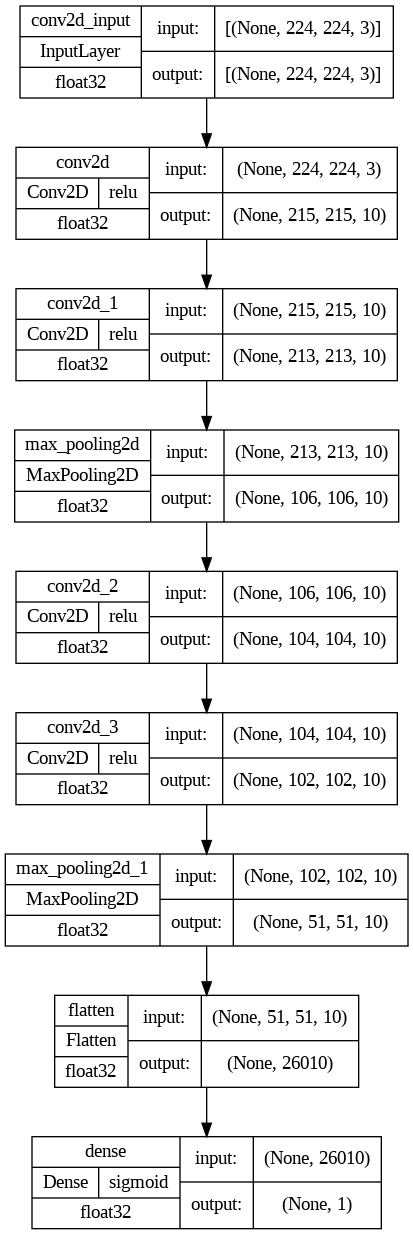

In [ ]:
model_details(model1)

<AxesSubplot:>

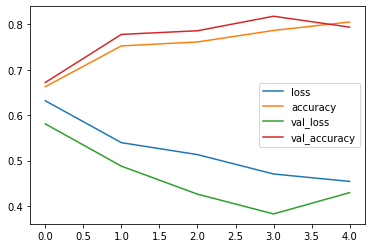

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

# Trying out for non CNN model OR an ANN model

In [ ]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(30,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

#compiling model
model2.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fitting model 
history2 = model2.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=valid_data,
                     validation_steps=len(valid_data)
                    )

Epoch 1/5
47/47 [==============================] - 11s 200ms/step - loss: 7.6244 - accuracy: 0.4987 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 198ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 12s 248ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 30)                4515870   
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 4)                 44        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 4,516,229
Trainable params: 4,516,229
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# improving non CNN model
tf.random.set_seed(42)
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model3.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
history3 = model3.fit(
    train_data,
    epochs=5,
    steps_per_epoch = len(test_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/5
25/25 [==============================] - 7s 234ms/step - loss: 5.4947 - accuracy: 0.5150 - val_loss: 1.7268 - val_accuracy: 0.5720
Epoch 2/5
25/25 [==============================] - 6s 244ms/step - loss: 1.1609 - accuracy: 0.6759 - val_loss: 0.5757 - val_accuracy: 0.7700
Epoch 3/5
25/25 [==============================] - 6s 243ms/step - loss: 0.6746 - accuracy: 0.7538 - val_loss: 0.5985 - val_accuracy: 0.7380
Epoch 4/5
25/25 [==============================] - 6s 227ms/step - loss: 0.6404 - accuracy: 0.7261 - val_loss: 0.6702 - val_accuracy: 0.6860
Epoch 5/5
25/25 [==============================] - 6s 264ms/step - loss: 0.6998 - accuracy: 0.7224 - val_loss: 0.6113 - val_accuracy: 0.7400


In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 100)               15052900  
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


# 1
* process data scaling (creating batches)
* creating model
* fit model
* evaluate model
* Improve model


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_img(target_dir,target_class):
    #targeting a directory
    target_folder = target_dir+"/"+target_class

    # getting random image path
    random_image = random.sample(os.listdir(target_folder),1)

    #reading image and ploting
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    # show input shape
    print(f"Image shape = {img.shape}") 
    return(img)

In [ ]:
plt.figure()
plt.subplot(1,2,1)
s_image = view_random_img('pizza_steak/train','steak')
plt.subplot(1,2,2)
p_img =view_random_img('pizza_steak/train','pizza')

In [10]:
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(rescale =1/255.) # max possible value of any image array is 255
datagen_test = ImageDataGenerator(rescale =1/255.)

In [5]:
train_dir = datagen_train.flow_from_directory(directory=train_dir,# directory to be targerted
                         batch_size = 32,#number of images per each batch
                         target_size = (224,224),# dimention to which image is to be converted
                         class_mode = "binary", # 0/1 or manyclass or many classes
                          seed = 42)
test_dir = datagen_test.flow_from_directory(
                        directory = test_dir,
                        target_size = (224,224),
                        batch_size=32,
                        class_mode = "binary",
                        seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


creating baseline cnn






In [6]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential



In [11]:
model5 = Sequential([
    Conv2D(
        filters = 10,
        kernel_size = 10,
        strides = 1,
        padding = 'valid',
        activation = 'relu',
        input_shape =(224,224,3)
    ),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [12]:
model5.compile(loss = 'binary_crossentropy',
               optimizer = Adam(),
               metrics=['accuracy'])

In [13]:
history5 = model5.fit(train_dir,
                      epochs = 5,
                      steps_per_epoch=len(test_dir),
                      validation_data = test_dir,
                      validation_steps = len(test_dir))

Epoch 1/5
16/16 [==============================] - 7s 330ms/step - loss: 1.9896 - accuracy: 0.5723 - val_loss: 0.5829 - val_accuracy: 0.6920
Epoch 2/5
16/16 [==============================] - 6s 360ms/step - loss: 0.5786 - accuracy: 0.7188 - val_loss: 0.5153 - val_accuracy: 0.7620
Epoch 3/5
16/16 [==============================] - 5s 318ms/step - loss: 0.6068 - accuracy: 0.6831 - val_loss: 0.5502 - val_accuracy: 0.7140
Epoch 4/5
16/16 [==============================] - 8s 498ms/step - loss: 0.5604 - accuracy: 0.7227 - val_loss: 0.4746 - val_accuracy: 0.7940
Epoch 5/5
16/16 [==============================] - 5s 311ms/step - loss: 0.5091 - accuracy: 0.7559 - val_loss: 0.4727 - val_accuracy: 0.7640


Evaluating

<Axes: >

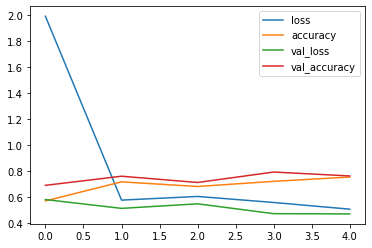

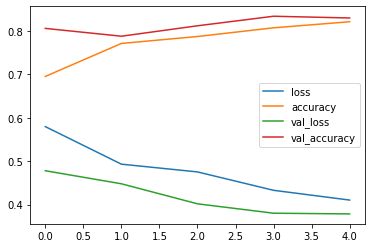

In [15]:
import pandas as pd
pd.DataFrame(history5.history).plot()
pd.DataFrame(history.history).plot()

In [ ]:
model5.evaluate(test_dir)

16/16 [==============================] - 3s 165ms/step - loss: 0.4846 - accuracy: 0.7940


[0.48460423946380615, 0.7940000295639038]

In [ ]:
history5.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
for name in history5.history:
    print(name,history5.history[name])

loss [0.796460747718811, 0.5513549447059631, 0.5796893835067749, 0.5040127038955688, 0.49914076924324036]
accuracy [0.6161417365074158, 0.7303149700164795, 0.72265625, 0.771484375, 0.7795275449752808]
val_loss [0.6809821128845215, 0.4271550476551056, 0.5513148307800293, 0.48432421684265137, 0.48460420966148376]
val_accuracy [0.5920000076293945, 0.8100000023841858, 0.7239999771118164, 0.7620000243186951, 0.7940000295639038]


In [7]:
def loss_curve(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs =  range(len(history.history['loss']))

    plt.plot(epochs,loss,label='loss')
    plt.plot(epochs,val_loss,label='val_loss')
    plt.title('loss')
    plt.legend()

    plt.figure()

    plt.plot(epochs,accuracy,label='accuracy')
    plt.plot(epochs,val_accuracy,label='val_accuracy')
    plt.title('accuracy')
    plt.legend()

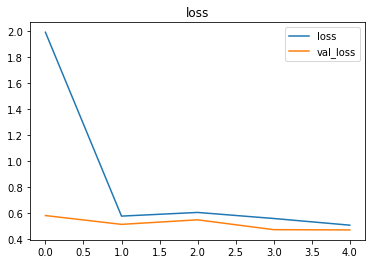

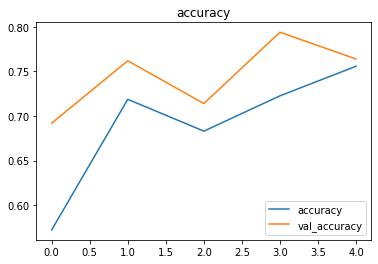

In [18]:
loss_curve(history5)

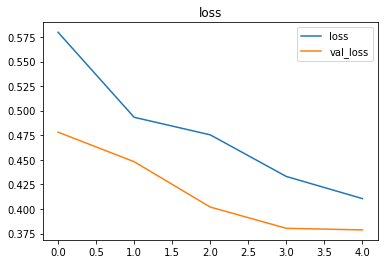

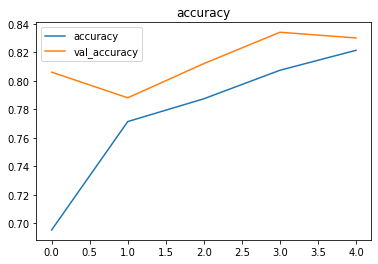

In [19]:
loss_curve(history)

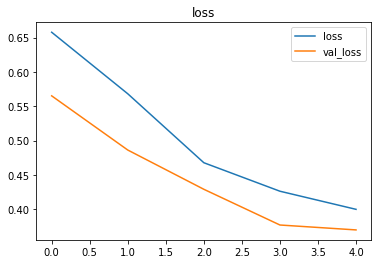

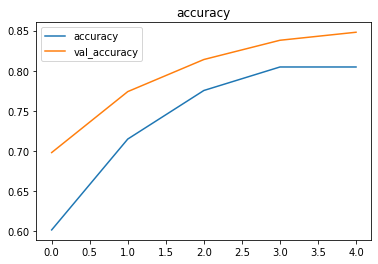

In [34]:
loss_curve(history6)

If there is large gap between train data and validation data theen there is overfitting of data

* inducing overfitting

* reducing overfitting





In [31]:
#adding more layers

model6 = Sequential([
    Conv2D(
        filters=10,
        kernel_size=2,
        padding='valid',
        activation='relu',
        input_shape = (224,224,3)
    ),
    MaxPool2D(pool_size=2),
    Conv2D(10,2,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1,activation='sigmoid')
])
model6.compile(
    loss="binary_crossentropy",
    optimizer= Adam(),
    metrics = ["accuracy"]
)

history6 = model6.fit(train_dir,
                      epochs = 5,
                      steps_per_epoch=len(test_dir),
                      validation_data = test_dir,
                      validation_steps = len(test_dir))

Epoch 1/5
16/16 [==============================] - 7s 311ms/step - loss: 0.6578 - accuracy: 0.6016 - val_loss: 0.5651 - val_accuracy: 0.6980
Epoch 2/5
16/16 [==============================] - 5s 319ms/step - loss: 0.5682 - accuracy: 0.7148 - val_loss: 0.4862 - val_accuracy: 0.7740
Epoch 3/5
16/16 [==============================] - 5s 330ms/step - loss: 0.4677 - accuracy: 0.7754 - val_loss: 0.4290 - val_accuracy: 0.8140
Epoch 4/5
16/16 [==============================] - 5s 299ms/step - loss: 0.4261 - accuracy: 0.8047 - val_loss: 0.3769 - val_accuracy: 0.8380
Epoch 5/5
16/16 [==============================] - 5s 352ms/step - loss: 0.3997 - accuracy: 0.8047 - val_loss: 0.3698 - val_accuracy: 0.8480


In [32]:
model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 223, 223, 10)      130       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 110, 110, 10)      410       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 55, 55, 10)       0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 30250)             0         
                                                                 
 dense_6 (Dense)             (None, 1)                

In [8]:
model7 = Sequential([
    Conv2D(
        filters=10,
        kernel_size=2,
        padding='valid',
        activation='relu',
        input_shape = (224,224,3)
    ),
    MaxPool2D(pool_size=2),
    Conv2D(10,2,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,2,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1,activation='sigmoid')
])
model7.compile(
    loss="binary_crossentropy",
    optimizer= Adam(),
    metrics = ["accuracy"]
)

history7 = model7.fit(train_dir,
                      epochs = 5,
                      steps_per_epoch=len(test_dir),
                      validation_data = test_dir,
                      validation_steps = len(test_dir))

Epoch 1/5
16/16 [==============================] - 17s 322ms/step - loss: 0.6874 - accuracy: 0.5312 - val_loss: 0.6580 - val_accuracy: 0.6780
Epoch 2/5
16/16 [==============================] - 5s 304ms/step - loss: 0.6400 - accuracy: 0.6406 - val_loss: 0.5945 - val_accuracy: 0.6700
Epoch 3/5
16/16 [==============================] - 6s 364ms/step - loss: 0.5727 - accuracy: 0.7207 - val_loss: 0.4924 - val_accuracy: 0.8000
Epoch 4/5
16/16 [==============================] - 5s 299ms/step - loss: 0.4792 - accuracy: 0.7913 - val_loss: 0.4481 - val_accuracy: 0.7920
Epoch 5/5
16/16 [==============================] - 7s 488ms/step - loss: 0.4398 - accuracy: 0.7972 - val_loss: 0.3879 - val_accuracy: 0.8320


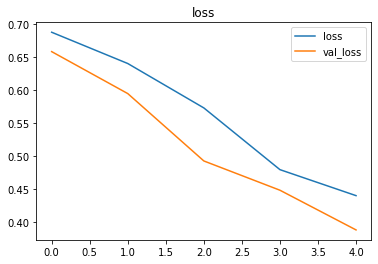

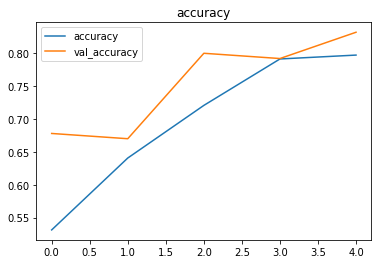

In [10]:
loss_curve(history7)

In [11]:
model8 = Sequential([
    Conv2D(
        filters=10,
        kernel_size=2,
        padding='valid',
        activation='relu',
        input_shape = (224,224,3)
    ),
    Conv2D(10,2,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,2,activation='relu'),
    Conv2D(10,2,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,2,activation='relu'),
    Conv2D(10,2,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1,activation='sigmoid')
])
model8.compile(
    loss="binary_crossentropy",
    optimizer= Adam(),
    metrics = ["accuracy"]
)

history8 = model8.fit(train_dir,
                      epochs = 5,
                      steps_per_epoch=len(test_dir),
                      validation_data = test_dir,
                      validation_steps = len(test_dir))

Epoch 1/5
16/16 [==============================] - 9s 332ms/step - loss: 0.6848 - accuracy: 0.5625 - val_loss: 0.6709 - val_accuracy: 0.5600
Epoch 2/5
16/16 [==============================] - 7s 450ms/step - loss: 0.6404 - accuracy: 0.6772 - val_loss: 0.5605 - val_accuracy: 0.7960
Epoch 3/5
16/16 [==============================] - 9s 565ms/step - loss: 0.5509 - accuracy: 0.7617 - val_loss: 0.5291 - val_accuracy: 0.7100
Epoch 4/5
16/16 [==============================] - 5s 314ms/step - loss: 0.5257 - accuracy: 0.7598 - val_loss: 0.4529 - val_accuracy: 0.8180
Epoch 5/5
16/16 [==============================] - 6s 367ms/step - loss: 0.4595 - accuracy: 0.8066 - val_loss: 0.4107 - val_accuracy: 0.8180


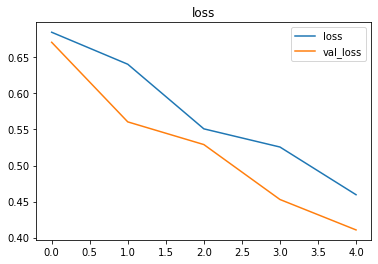

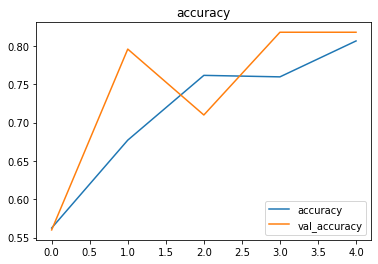

In [12]:
loss_curve(history8)

data augementation 

augementation == making changes in image and adding that image

In [8]:
# create imagedatagen for train data
# create with augementation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
train_datagen_aug = ImageDataGenerator(rescale=1/225.,
                                       rotation_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       width_shift_range = 0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip = True
                                       )
# image gen without augementation for train data
train_datagen = ImageDataGenerator(rescale=1/225.)

#creating imagedatagen for test data
#create with augementation
# Audmentation is only performedfor training data no need on test data
test_datagen_aug = ImageDataGenerator(rescale=1/225.,
                                       rotation_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       width_shift_range = 0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip = True
                                       )
# image gen without augementation for test data
test_datagen = ImageDataGenerator(rescale=1/225.)

In [11]:
# getting data and augmenting it.
trian_data_augement = train_datagen_aug.flow_from_directory(directory = train_dir,
                                                             batch_size=32,
                                                            target_size=(224,224),
                                                            class_mode='binary',
                                                            shuffle=False
                                                            )

#creating non augmented train data batches
train_data = train_datagen.flow_from_directory(directory=train_dir,# directory to be targerted
                         batch_size = 32,#number of images per each batch
                         target_size = (224,224),# dimention to which image is to be converted
                         class_mode = "binary", # 0/1 or manyclass or many classes
                          shuffle=False)

#creating non augmented test data batches
test_data = test_datagen.flow_from_directory(directory=test_dir,# directory to be targerted
                         batch_size = 32,#number of images per each batch
                         target_size = (224,224),# dimention to which image is to be converted
                         class_mode = "binary" # 0/1 or manyclass or many classes
                          )


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
image,label = train_data.next()
aug_imd,aug_label = trian_data_augement.next()

In [ ]:
import random
rn = random.randint(0,32)
plt.imshow(image[rn])
plt.figure()
plt.imshow(aug_imd[rn])

Building a model on augemented data 
* no shuffel

In [15]:
# model for augmented data without shuffling
model8 = Sequential([
    Conv2D(
        filters =10,
        kernel_size=3,
        padding='valid',
        input_shape = (224,224,3)
    ),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [16]:
model8.compile(
    loss ='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [17]:
history8 = model8.fit(trian_data_augement,
                      epochs=5,
                      steps_per_epoch=len(trian_data_augement),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 39s 526ms/step - loss: 0.6996 - accuracy: 0.4360 - val_loss: 0.6899 - val_accuracy: 0.5600
Epoch 2/5
47/47 [==============================] - 25s 525ms/step - loss: 0.6927 - accuracy: 0.5400 - val_loss: 0.6641 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 24s 517ms/step - loss: 0.6708 - accuracy: 0.5973 - val_loss: 0.5859 - val_accuracy: 0.6560
Epoch 4/5
47/47 [==============================] - 26s 544ms/step - loss: 0.6413 - accuracy: 0.6560 - val_loss: 0.5490 - val_accuracy: 0.7080
Epoch 5/5
47/47 [==============================] - 24s 521ms/step - loss: 0.6207 - accuracy: 0.6533 - val_loss: 0.5203 - val_accuracy: 0.7360


In [ ]:
loss_curve(history8)

Shufffeling data

In [19]:
train_data_aug_shu = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size=(224,224),
    class_mode='binary',
    batch_size=32,
    shuffle=True 
)

Found 1500 images belonging to 2 classes.


In [20]:
model9 = Sequential([
    Conv2D(
        filters =10,
        kernel_size=3,
        padding='valid',
        input_shape = (224,224,3)
    ),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [21]:
model9.compile(
    loss ='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [23]:
history9 = model9.fit(train_data_aug_shu,
                      epochs=5,
                      steps_per_epoch=len(trian_data_augement),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 30s 572ms/step - loss: 0.6120 - accuracy: 0.6707 - val_loss: 0.4631 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 25s 522ms/step - loss: 0.5427 - accuracy: 0.7347 - val_loss: 0.3885 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 24s 520ms/step - loss: 0.4964 - accuracy: 0.7653 - val_loss: 0.4059 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 24s 519ms/step - loss: 0.4860 - accuracy: 0.7747 - val_loss: 0.3421 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 24s 515ms/step - loss: 0.4729 - accuracy: 0.7827 - val_loss: 0.3309 - val_accuracy: 0.8560


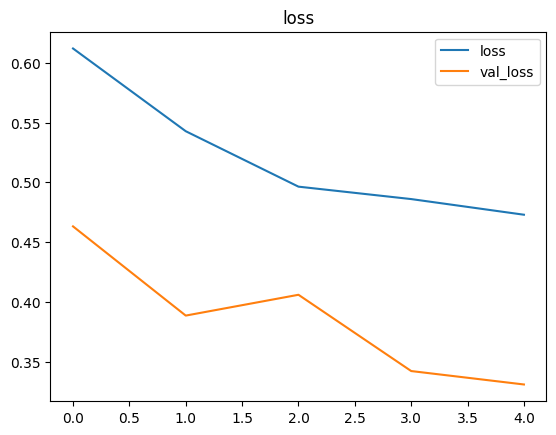

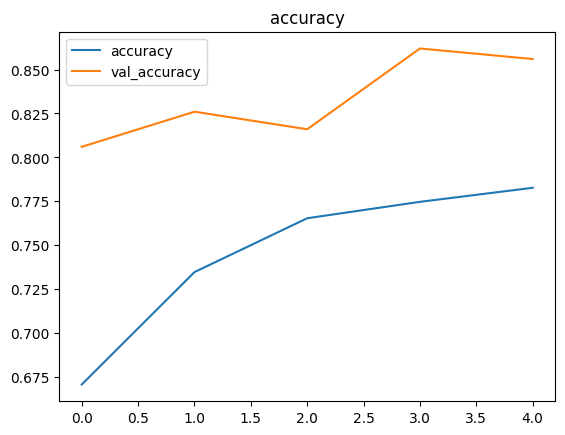

In [24]:
loss_curve(history9)

In [26]:
model0 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           input_shape=(224,224,3),
           padding='valid',
           activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2,padding='valid'),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2,padding='valid'),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [28]:
model0.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [29]:
history0 = model0.fit(train_data_aug_shu,
                      epochs=5,
                      steps_per_epoch=len(train_data_aug_shu),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 29s 541ms/step - loss: 0.6365 - accuracy: 0.6333 - val_loss: 0.4592 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 25s 531ms/step - loss: 0.5033 - accuracy: 0.7633 - val_loss: 0.3471 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 25s 527ms/step - loss: 0.4820 - accuracy: 0.7813 - val_loss: 0.3433 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 25s 528ms/step - loss: 0.4453 - accuracy: 0.8053 - val_loss: 0.3136 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 25s 527ms/step - loss: 0.4448 - accuracy: 0.8060 - val_loss: 0.2962 - val_accuracy: 0.8640


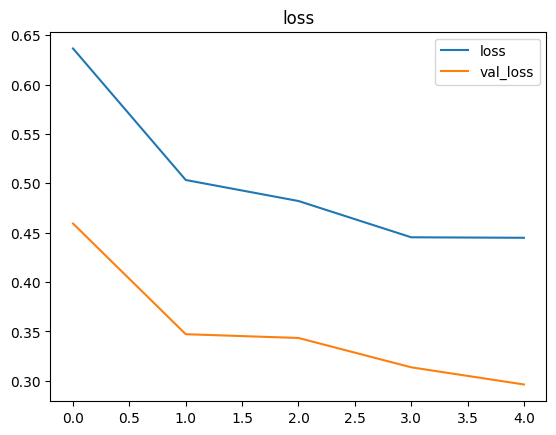

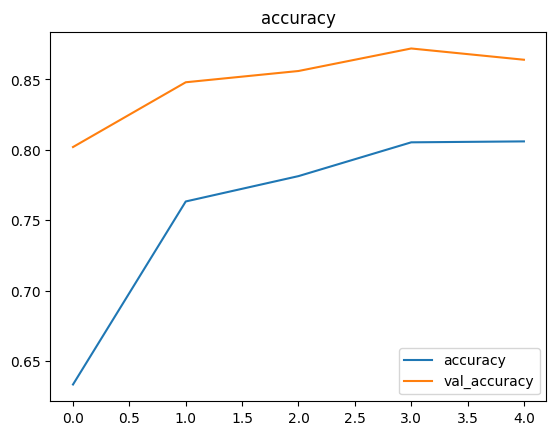

In [30]:
loss_curve(history0)

In [35]:
class_name = ['pizza','steak']

In [36]:
print(class_name)

['pizza', 'steak']


In [41]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')

--2023-03-30 12:40:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2023-03-30 12:40:28 (88.6 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



In [40]:
steak = mpimg.imread("03-steak.jpeg")

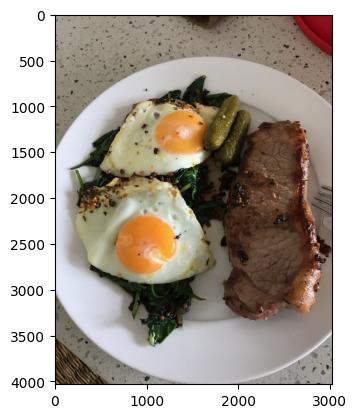

In [42]:
plt.imshow(steak)

In [43]:
pizza = mpimg.imread('images.jpeg')

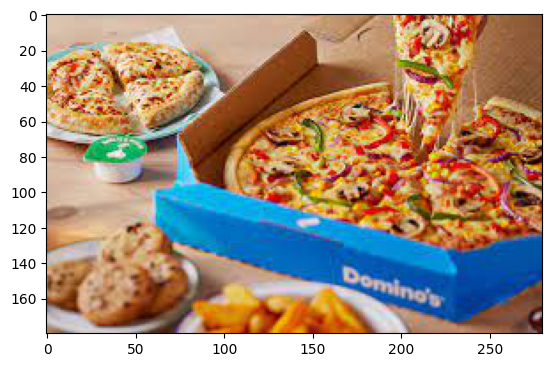

In [44]:
plt.imshow(pizza)

In [45]:
steak.shape,pizza.shape

((4032, 3024, 3), (180, 280, 3))

In [50]:
import tensorflow as tf

In [52]:
xyz.shape

TensorShape([1, 4032, 3024, 3])

In [53]:
steak.shape

(4032, 3024, 3)

In [61]:
def preprocess_image(filename,imshape=224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img,size=[imshape,imshape])
    img = img/225.
    img = tf.expand_dims(img,axis=0)
    return img

In [62]:
steak = preprocess_image('03-steak.jpeg')

In [ ]:
steak

In [64]:
pizza = preprocess_image('images.jpeg')

In [66]:
x = model0.predict(steak)

1/1 [==============================] - 0s 72ms/step


In [65]:
model0.predict(pizza)

1/1 [==============================] - 0s 71ms/step


array([[0.02254019]], dtype=float32)

In [73]:
def pred(model,img):
    pre = model.predict(img)
    if pre > .5:
        print('Its likely to be steak')
    else:
        print('It may be a pizza')

In [72]:
pred(model0,pizza)

1/1 [==============================] - 0s 100ms/step
It ma be a pizza


In [74]:
pizza.shape

TensorShape([1, 224, 224, 3])